In [71]:
import torch
import numpy as np


In [73]:
import nibabel as nib
import matplotlib.pyplot as plt

In [79]:
p1 = nib.load('database/training/patient001/patient001_frame12.nii.gz')
p1_gt = nib.load('database/training/patient001/patient001_frame12_gt.nii.gz')

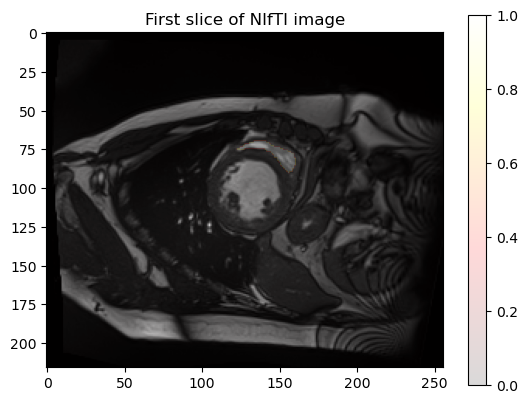

In [117]:
# Load the NIfTI image file
img = p1
# Get the data from the image
data = img.get_fdata()

img_gt = p1_gt
# Get the data from the image
data_gt = img_gt.get_fdata()

data_gt_rv = data_gt == 1

slice_num = 5

# Display the first slice of the image
plt.imshow(data[:, :,slice_num], cmap='gray')
plt.imshow(data_gt_rv[:, :,slice_num], cmap='hot', alpha=0.15)

plt.colorbar()
plt.title('First slice of NIfTI image')
plt.show()

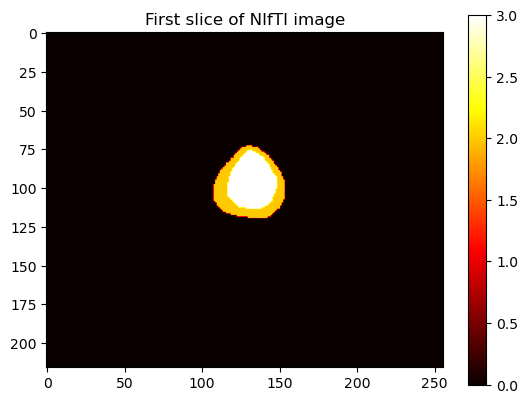

In [88]:
# Load the NIfTI image file
img = p1_gt
# Get the data from the image
data = img.get_fdata()

# Display the first slice of the image
plt.imshow(data[:, :,1], cmap='hot')

plt.colorbar()
plt.title('First slice of NIfTI image')
plt.show()

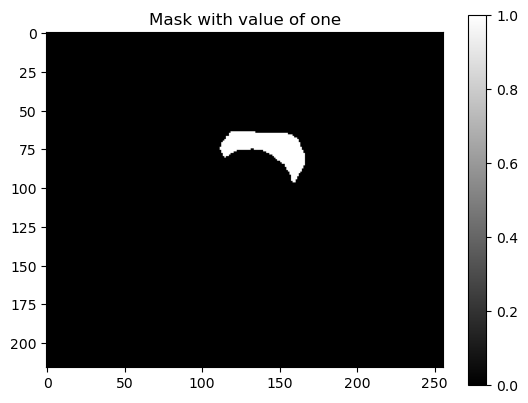

In [103]:
# Create a mask where the value is one
mask = data == 1

# Display the mask
plt.imshow(mask[:, :, 2], cmap='gray')

plt.colorbar()
plt.title('Mask with value of one')
plt.show()

In [78]:
print(data.shape)
np.unique(data[:,:,5])
unique_values, counts = np.unique(data[:,:,5], return_counts=True)


(216, 256, 10)
[0. 1. 2. 3.] [52639   248  1057  1352]


Visualizing patient001_ED_slice_1.png


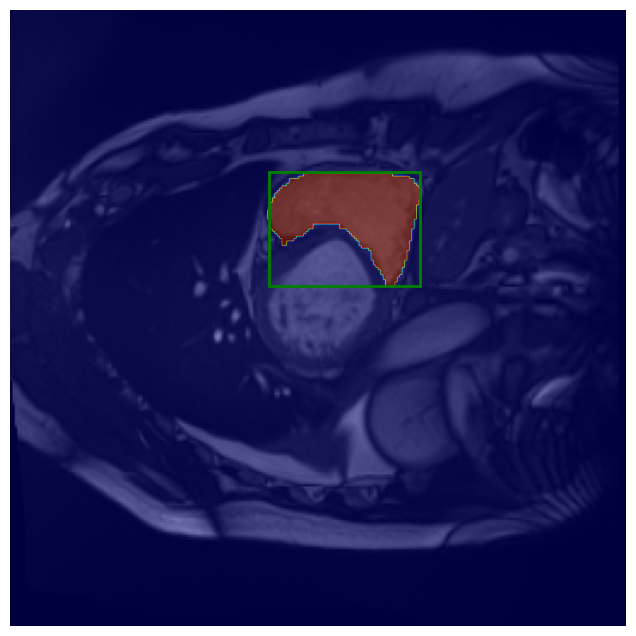

Visualizing patient001_ED_slice_2.png


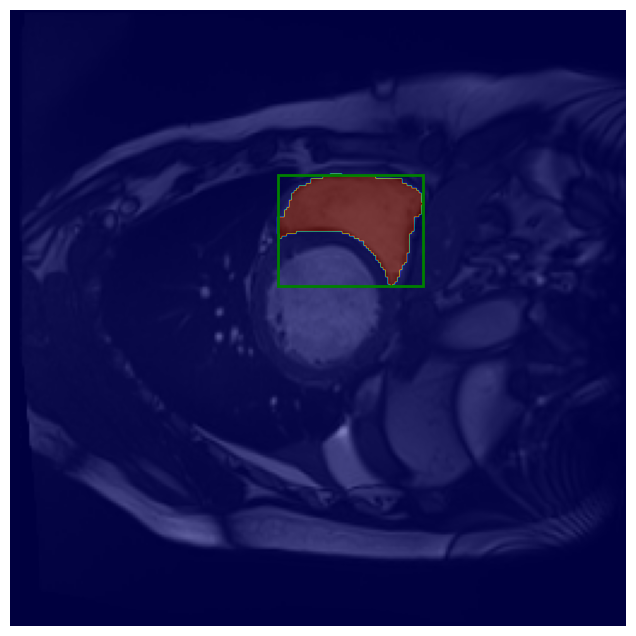

Visualizing patient001_ED_slice_3.png


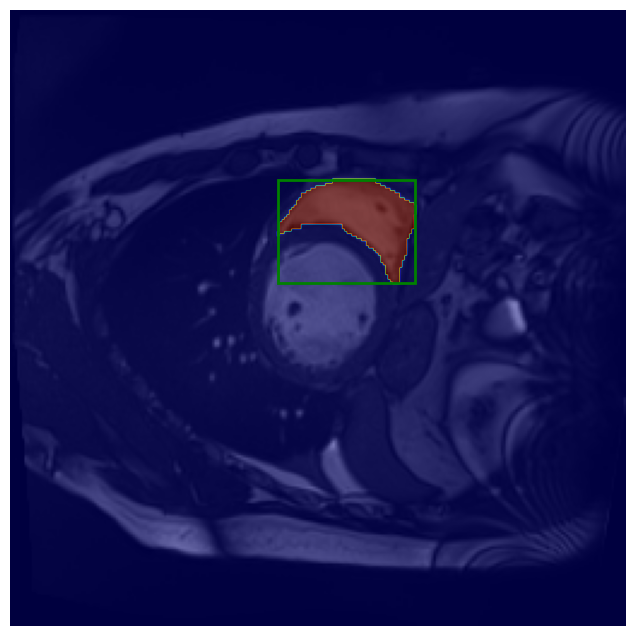

Visualizing patient001_ED_slice_4.png


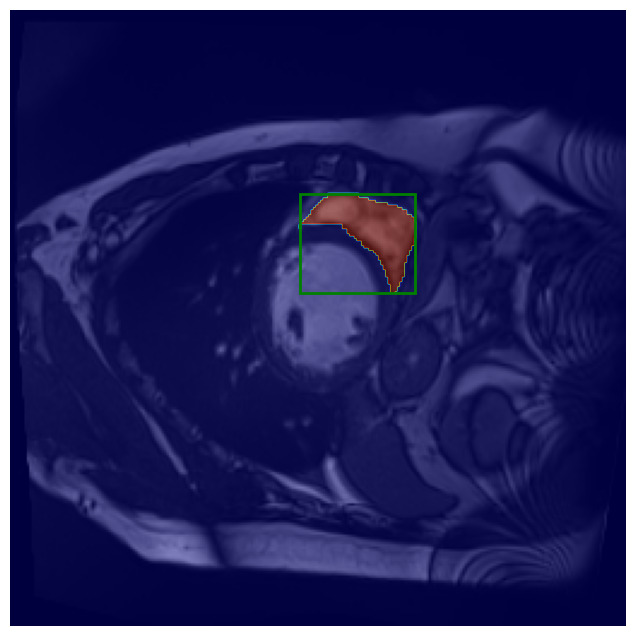

Visualizing patient001_ED_slice_5.png


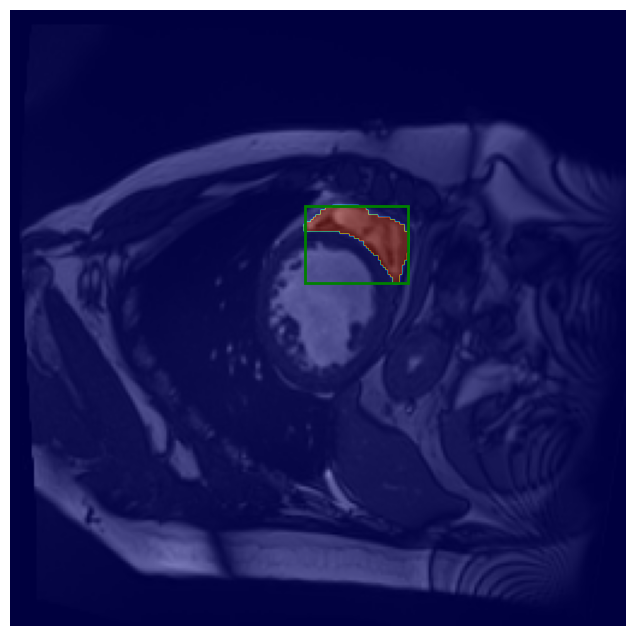

In [1]:
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Define the paths
# Replace './output/training' with './output/testing' to visualize testing data
base_dir = './output/training'
images_dir = os.path.join(base_dir, 'images')
masks_dir = os.path.join(base_dir, 'masks')
labels_dir = os.path.join(base_dir, 'yolo_labels')

# Get the list of image files
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.png')])

# Function to convert YOLO format to bounding box coordinates
def yolo_to_bbox(yolo_label_path, img_width, img_height):
    with open(yolo_label_path, 'r') as f:
        lines = f.readlines()
        bboxes = []
        for line in lines:
            elems = line.strip().split()
            class_id = int(elems[0])
            x_center = float(elems[1])
            y_center = float(elems[2])
            width = float(elems[3])
            height = float(elems[4])
            
            # Convert normalized coordinates to pixel values
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            
            x_min = x_center - width / 2
            y_min = y_center - height / 2
            x_max = x_center + width / 2
            y_max = y_center + height / 2
            
            bbox = [x_min, y_min, x_max, y_max]
            bboxes.append({'class_id': class_id, 'bbox': bbox})
    return bboxes

# Function to visualize image, mask, and bounding box
def visualize_image(image_path, mask_path, label_path):
    # Load image
    image = Image.open(image_path).convert('RGB')
    img_width, img_height = image.size
    
    # Load mask
    mask = Image.open(mask_path).convert('L')
    mask = mask.resize((img_width, img_height))
    
    # Load bounding boxes
    bboxes = yolo_to_bbox(label_path, img_width, img_height)
    
    # Create a figure
    plt.figure(figsize=(8, 8))
    
    # Display image
    plt.imshow(image)
    
    # Overlay mask with transparency
    plt.imshow(mask, cmap='jet', alpha=0.5)
    
    # Draw bounding boxes
    ax = plt.gca()
    for bbox_info in bboxes:
        bbox = bbox_info['bbox']
        class_id = bbox_info['class_id']
        x_min, y_min, x_max, y_max = bbox
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             fill=False, edgecolor='green', linewidth=2)
        ax.add_patch(rect)
        # Optionally add class label
        # ax.text(x_min, y_min - 5, f'Class: {class_id}', color='green', fontsize=12)
    
    plt.axis('off')
    plt.show()

# Visualize a few images
num_images_to_visualize = 5  # Set the number of images you want to visualize
for idx, image_file in enumerate(image_files[:num_images_to_visualize]):
    image_path = os.path.join(images_dir, image_file)
    mask_file = image_file.replace('.png', '_mask.png')
    mask_path = os.path.join(masks_dir, mask_file)
    label_file = image_file.replace('.png', '.txt')
    label_path = os.path.join(labels_dir, label_file)
    
    if os.path.exists(mask_path) and os.path.exists(label_path):
        print(f"Visualizing {image_file}")
        visualize_image(image_path, mask_path, label_path)
    else:
        print(f"Skipping {image_file} due to missing mask or label file.")
